<a href="https://drive.google.com/file/d/1iYgNRYXjGU3UCir1jyaymNswNgu6duuu/view?usp=sharing" target="_blank" >
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

# Training a CNN classifier - End to End

In [4]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam, SGD

# Some imports for getting the CIFAR-10 dataset and for help with visualization*]
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [5]:
# Run this cell to load a subset of the cifar10dataset
(X_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)
print(X_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


## Info on the dataset

> The original CIFAR10 dataset consists of 50,000 images in the training set & an additional 10,000 images in the test set.

Owning to the limitations of the platform, we will use *only* 1000 images for training set, and 100 images for the test set.
However, you are encouraged to retrain the model with the original training set to get an improvement on your performance.
Please find instructions to load the entire dataset [here](https://keras.io/api/datasets/cifar10/)

In [6]:
# Normalize images
X_train = np.array(X_train)/255.

# Since we have 10 output labels, we specify that in 'to_categorical' function
num_classes = 10
y_train = to_categorical(y_train,num_classes = num_classes)


In [7]:
# A dictionary to turn class index into class labels for CIFAR-10
cifar10dict = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : \
               'deer', 5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}
               

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.503921568627451..1.4607843137254903].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.5431372549019607..1.4686274509803923].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.5196078431372549..1.4764705882352942].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.5..1.5].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.5901960784313726..1.4607843137254903].


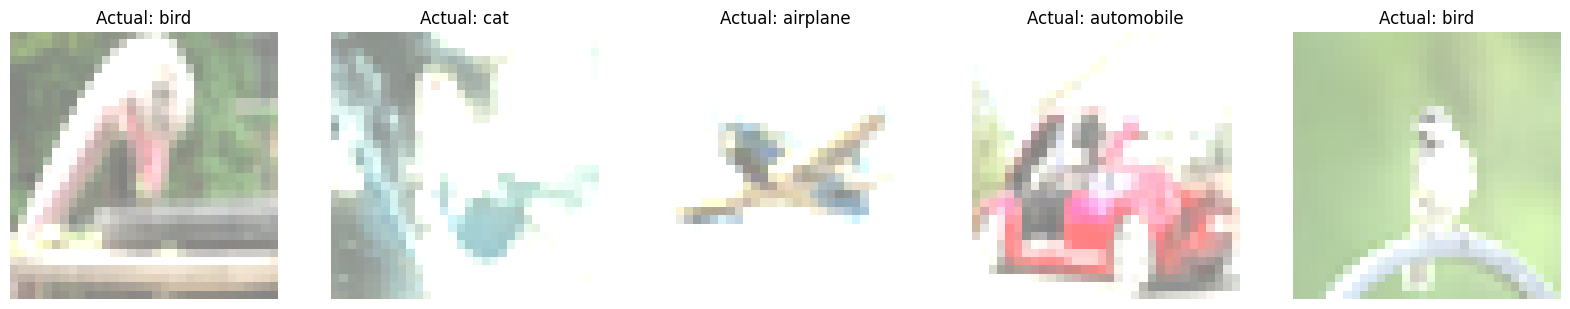

In [8]:
# Let's look at some sample images with their labels
# Run the helper code below to plot the image and its label
num_images = 5

fig, ax = plt.subplots(1,num_images,figsize=(20,10))
for i in range(num_images):
    image_index = np.random.randint(0,1000)
    img = (X_train[image_index] + 0.5)
    ax[i].imshow(img)
    label = cifar10dict[np.argmax(y_train[image_index],axis=-1)]
    ax[i].set_title(f'Actual: {label}')
    ax[i].axis('off')


## Building the CNN

In [9]:

# Build a CNN that takes the (32,32,3) images as input,
# and gives out 10 outputs that give the probability of each class
# We suggest a model architecture in the hints, but feel free
# to use your own variation

___
# Your code here
def build_basic(kernel_size=3, input_shape=(32, 32, 3)):
    model = Sequential(name='Convolution')
    model.add(Input(shape=input_shape))
    
    model.add(Conv2D(32, kernel_size=kernel_size, padding='same', use_bias=True))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, kernel_size=kernel_size, use_bias=True))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, kernel_size=kernel_size, padding='same', use_bias=True))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, kernel_size=kernel_size, use_bias=True))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='sigmoid'))
    
    return model

# Define the EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=20,         # Stop after 250 epochs with no improvement
    restore_best_weights=True  # Restore the best weights found during training
)


# Compile the model

model = build_basic()
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# View a summary of your model to see if the architecture is correct
model.summary()


Model: "Convolution"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,253,674 (4.78 MB)

 Trainable params: 1,252,266 (4.78 MB)

 Non-trainable params: 1,408 (5.50 KB)

## Model Training

In [10]:
# Fit the model with the training data
# Specify a batch size, and number of epochs to train
batch_size = 64
epochs = 300

# keep a validation split of 0.2 to begin with and fit the model
# your code here

history = model.fit(
    X_train, y_train,
    epochs = epochs,
    batch_size = batch_size,
    validation_split = 0.2,
    callbacks=[early_stopping]

)


Epoch 1/300
201/625 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.3207 - loss: 2.1138

KeyboardInterrupt: 

In [ ]:
# Write the code to plot the following:
# - Training loss
# - Validation loss
# - Training accuracy 
# - Validation accuracy
# Your code here

# Function to plot the training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)



## Model evaluation

In [ ]:
# Import the mini test set
x_test,y_test = np.load('cifar_Xtest.npy'),np.load('cifar_ytest.npy')


In [ ]:
# Preprocess the test set 
X_test = np.array(x_test)/255

# Convert test labels to one_hot encoding
num_classes = 10
y_test = to_categorical(y_test,num_classes = num_classes)

In [ ]:
# Evaluate the model to get the model metric specific
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')


In [ ]:
# Get the predicted label numbers by using .argmax() function
y_pred = np.argmax(model.predict(X_test),axis=1)

# Use the same function to get the predicted label numbers for test set
y_labels = np.argmax(y_test,axis=1)


In [ ]:
# Get the confusion matrix for the predictions
# Read more about the confusion matrix here
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
cf_matrix = confusion_matrix(y_labels, y_pred)
print(cf_matrix)


In [ ]:
# Find below the helper code to make a nice plot of the above confusion matrix
def plot_confusion_matrix(confusion_matrix,cifar10_dictionary,ax=None):
    df_cm = pd.DataFrame(confusion_matrix, index = cifar10_dictionary.values(),
                      columns = cifar10_dictionary.values())
    sns.set(font_scale=1.2) # for label size
    ax = sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap='YlOrBr')
    ax.xaxis.set_ticks_position('top')
    plt.savefig('confusion_matrix.png')

In [ ]:
# Here we call the plotting function
# Observe the most misclassfied entries
# and discuss ways to improve performance
fig,ax = plt.subplots(figsize=(12,8))
plot_confusion_matrix(cf_matrix,cifar10dict,ax=ax)


## Improving model performance

As you would have noticed, your model starts to overfit on the training set.
You may employ several ways to remedy this: 
1. Get more training data (use the entire CIFAR10 training set)
2. Use Data augmentation
3. Use other regularization methods